In [1]:
#importing essential packages
import os
import numpy as np
import pandas as pd
import seaborn as sns
from time import time
import matplotlib.pyplot
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [2]:
#importing data
test_data = pd.read_csv("test.csv")
train_data = pd.read_csv("train.csv")

In [3]:
#checking for missing values in training dataset
#we are using median to replace NaN data as its suitable for continuous data with outliers.
train_data['Age'].fillna(train_data['Age'].median(),inplace=True)

test_data['Age'].fillna(test_data['Age'].median(),inplace=True)

In [4]:
train_data['Cabin'].fillna('Unknown',inplace=True)
train_data['Embarked'].fillna('Unknown',inplace=True)

test_data['Cabin'].fillna('Unknown',inplace=True)
test_data['Fare'].fillna(train_data['Fare'].median(),inplace=True)

In [5]:
#performing Exploratory Data Analysis

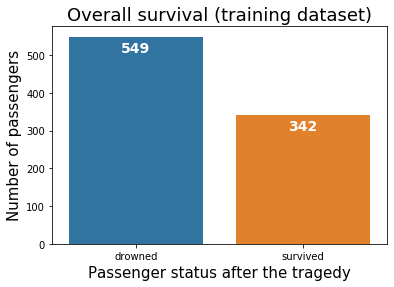

In [6]:
sns.countplot(x='Survived',data=train_data)
plt.xticks( np.arange(2), ['drowned', 'survived'] )
plt.title('Overall survival (training dataset)',fontsize= 18)

# set x label
plt.xlabel('Passenger status after the tragedy',fontsize = 15)
# set y label
plt.ylabel('Number of passengers',fontsize = 15)

labels = (train_data['Survived'].value_counts())
for i, v in enumerate(labels):
    plt.text(i, v-40, str(v), horizontalalignment = 'center', size = 14, color = 'w', fontweight = 'bold')
    
plt.show()

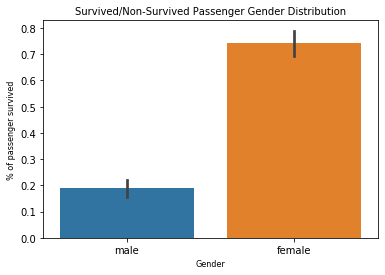

In [7]:
sns.barplot(x = "Sex", y = "Survived", data=train_data)
plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize =10)
labels = ['Female', 'Male']
plt.ylabel("% of passenger survived", fontsize = 8)
plt.xlabel("Gender",fontsize = 8)
plt.show()

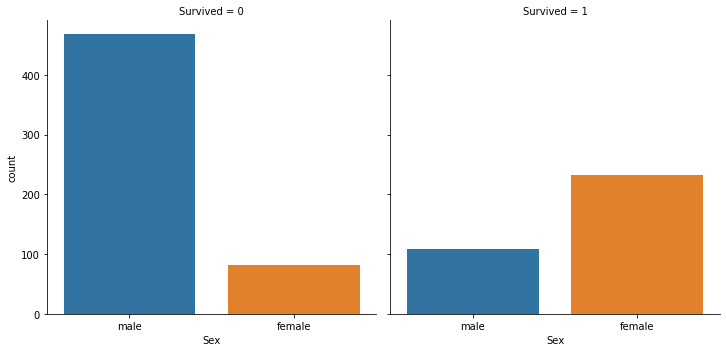

In [8]:
sns.catplot(x='Sex', col='Survived', kind='count', data=train_data)

plt.show()

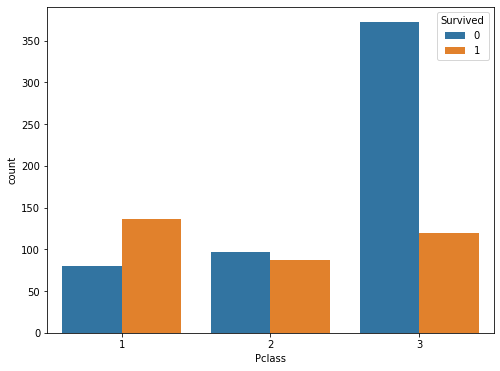

In [9]:
plt.subplots(figsize = (8,6))
sns.countplot('Pclass',hue='Survived',data=train_data)
plt.show()

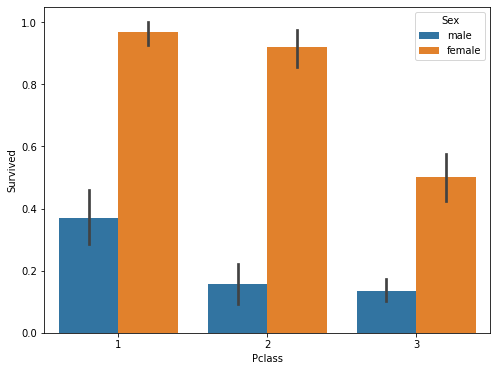

In [10]:
plt.subplots(figsize = (8,6))
sns.barplot('Pclass','Survived',data=train_data,hue='Sex')
plt.show()

In [11]:
print("% of survivals in") 
print("1st Class : ", train_data.Survived[train_data.Pclass == 1].sum()/train_data.Survived[train_data.Pclass == 1].count()*100)
print("2nd Class : ", train_data.Survived[train_data.Pclass == 2].sum()/train_data.Survived[train_data.Pclass == 2].count()*100)
print("3rd Class : ", train_data.Survived[train_data.Pclass == 3].sum()/train_data[train_data.Pclass == 3].Survived.count()*100)

% of survivals in
1st Class :  62.96296296296296
2nd Class :  47.28260869565217
3rd Class :  24.236252545824847


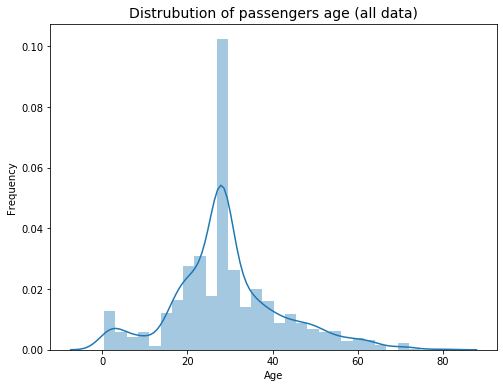

In [12]:
plt.subplots(figsize=(8,6))
sns.distplot(train_data.Age)
plt.title('Distrubution of passengers age (all data)',fontsize= 14)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

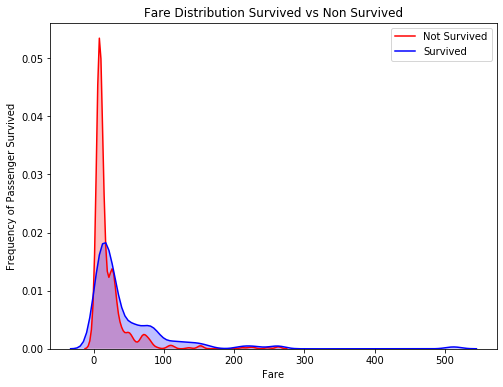

In [13]:
plt.subplots(figsize=(8,6))

ax=sns.kdeplot(train_data.loc[(train_data['Survived'] == 0),'Fare'],color='r',shade=True,label='Not Survived')
ax=sns.kdeplot(train_data.loc[(train_data['Survived'] == 1),'Fare'],color='b',shade=True,label='Survived' )
plt.title('Fare Distribution Survived vs Non Survived')
plt.ylabel('Frequency of Passenger Survived')
plt.xlabel('Fare')
plt.show()


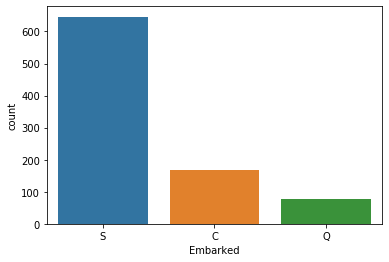

In [14]:
train_data['Embarked'] = train_data['Embarked'].replace('Unknown','S')

sns.countplot(train_data.Embarked)
labels = (train_data['Embarked'].value_counts())

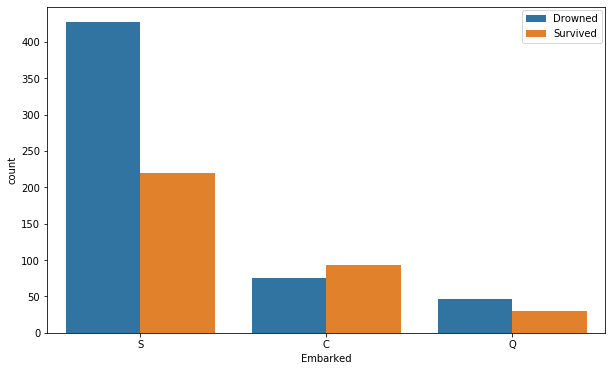

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(train_data['Embarked'],hue='Survived',data=train_data)
plt.legend(( 'Drowned', 'Survived'), loc=(0.85,0.89))
plt.show()

In [16]:
#Feature Enigeering

In [17]:
total_data=train_data.append(test_data,sort = True)

In [18]:
total_data.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [19]:
#Feature Selection

In [20]:
total_data['Family_size'] = total_data['SibSp'] + total_data['Parch'] + 1
total_data['Alone'] = 1
total_data['Alone'].loc[total_data['Family_size'] > 1] = 0

C:\Users\Murasame\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [21]:
#Building Machine Learning Models

In [22]:
features = ['Embarked','Fare','Pclass','Sex','Family_size','Alone']

labelencoder = LabelEncoder()
total_data['Sex'] = labelencoder.fit_transform(total_data['Sex'])
#train_data.head(8)

total_data['Embarked'] = total_data['Embarked'].astype('category')
total_data['Embarked'] = total_data['Embarked'].cat.codes

In [23]:
df_train = total_data[0:891]
df_test =  total_data[891:]
X = df_train[features]
y = df_train['Survived'].astype(int)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=78941)

In [24]:
#Random Forest

In [25]:
t_rf1 = time()
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
t_rf2 = time()
rf_time = t_rf2-t_rf1

In [26]:
#Logistic Regression

In [27]:
t_log1 = time()
logreg = LogisticRegression(solver= 'lbfgs',max_iter=400)
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
t_log2 = time()
log_time = t_log2-t_log1

In [28]:
#K-Nearest Neighbours

In [29]:
t_knn1 = time()
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test) 
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
t_knn2 = time()
knn_time = t_knn2-t_knn1

In [30]:
#Gaussian Naive Bayes

In [31]:
t_gnb1 = time()
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
t_gnb2 = time()
gnb_time = t_gnb2-t_gnb1

In [32]:
#Linear Support Vector Machine

In [33]:
t_svm1 = time()
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
t_svm2 = time()
svm_time = t_svm2-t_svm1

C:\Users\Murasame\Anaconda3\lib\site-packages\sklearn\svm\_base.py:975: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [34]:
#Decision Tree

In [35]:
t_dt1 = time()
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
Y_pred = decision_tree.predict(X_test) 
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
t_dt2 = time()
dt_time = t_dt2-t_dt1

In [36]:
#Finalizing results

In [37]:
results = pd.DataFrame({
    'Model': [ 'KNN', 'Logistic Regression','Random Forest', 'Naive Bayes','Support Vector Machine','Decision Tree'],
    'Score': [ acc_knn, acc_log,acc_random_forest, acc_gaussian,acc_linear_svc, acc_decision_tree],
    'Time Taken': [knn_time,log_time,rf_time,gnb_time,svm_time,dt_time]
})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model,Time Taken
Score,,
92.98,Random Forest,0.288230
92.98,Decision Tree,0.011968
83.43,KNN,0.055851
81.74,Logistic Regression,0.044879
80.06,Naive Bayes,0.011967
80.06,Support Vector Machine,0.049868
